**Note**: the output images are not quite formatted as desired: there is still a white border.


It is required to have the following folder structure:

- genres_spectrograms
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock
-  genres_wav
  - blues
  - classical
  - country
  - disco
  - hiphop
  - jazz
  - metal
  - pop
  - reggae
  - rock

In [5]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import numpy as np

661200
220400.0


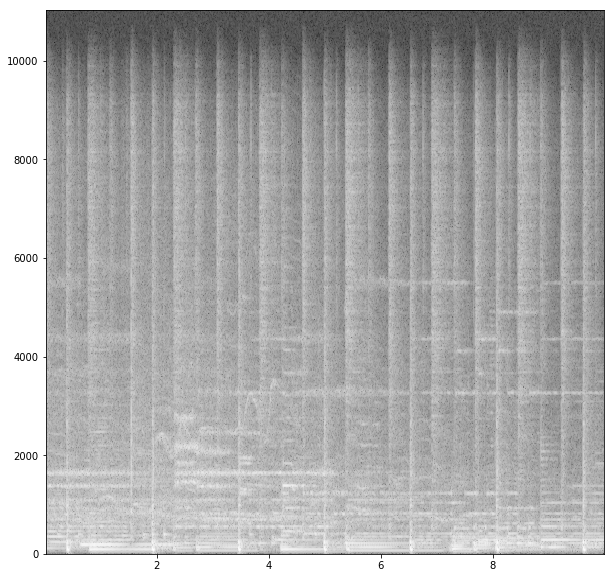

In [6]:
sample_rate, samples = wavfile.read('genres_wav/reggae/reggae.00001.wav')
samples = samples[:,0]

print(len(samples))
print(len(samples)/3)

# Take first third of sample
samples = samples[:220400]

NFFT = 1024  # the length of the windowing segments

fig = plt.figure(figsize=(10,10))
#ax1.plot(samples)
Pxx, freqs, bins, im = plt.specgram(samples, NFFT=NFFT, Fs=sample_rate, noverlap=900, cmap="gray")
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

Working on blues files
    converting blues.00000.wav
    converting blues.00001.wav
    converting blues.00002.wav
    converting blues.00003.wav
    converting blues.00004.wav


KeyboardInterrupt: 

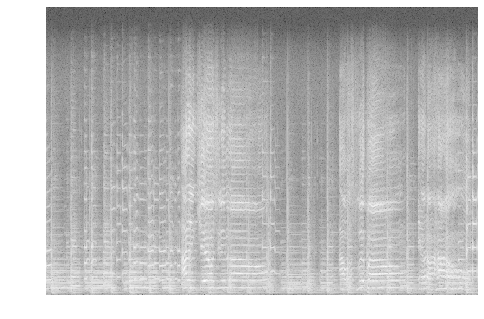

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
directory = 'genres_wav'

#styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
styles = ['blues']

fig,ax = plt.subplots(1)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')

#fig = plt.figure(figsize=(10,10))
#plt.axis('off')

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            print("    converting "+filename)
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            samples = samples[:,0]

            # Take first third of sample
            samples = samples[:220400]

            NFFT = 1024  # the length of the windowing segments

            Pxx, freqs, bins, im = ax.specgram(samples, NFFT=NFFT, Fs=sample_rate, noverlap=900, cmap="gray")
            plt.savefig('genres_spectrograms/'+style+'/'+filename+'.png', bbox_inches='tight', pad_inches=0)
        else:
            pass

# Librosa spectrograms may be better ?

661200
220400.0


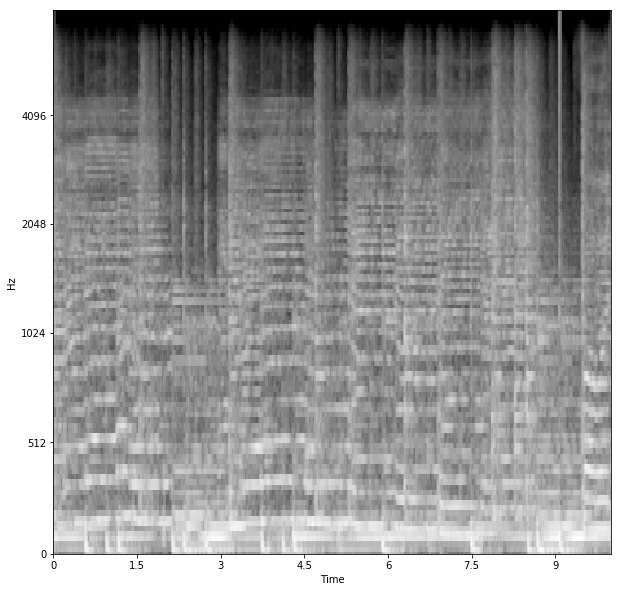

In [54]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import pylab

sample_rate, samples = wavfile.read('genres_wav/rock/rock.00001.wav')
samples = samples[:,0]

print(len(samples))
print(len(samples)/3)

# Take first third of sample
samples = samples[:220400]

samples = samples / np.max(np.abs(samples))

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

fig = plt.figure(figsize=(10,10))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")

pylab.figure(figsize=(3,3))
pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
pylab.savefig('test.jpg', bbox_inches=None, pad_inches=0)
pylab.close()

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
directory = 'genres_wav'

styles = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
#styles = ['blues']

# number of frequency bins (vertical resolution of the spectrogram)
n_mels = 128

# into how many spectrograms should a single song be splitted
n_splits = 3

for style in styles:
    print("Working on "+style+" files")
    for filename in os.listdir(directory+"/"+style):
        if filename.endswith(".wav"):
            print("    converting "+filename)
            sample_rate, samples = wavfile.read('genres_wav/'+style+'/'+filename)
            
            # make the sample mono
            samples = samples[:,0]
            
            # normalize samples
            samples = samples / np.max(np.abs(samples))

            # split the sample    
            splits = np.split(samples, n_splits)
            
            for i, split in enumerate(splits):
                S = librosa.feature.melspectrogram(y=split, sr=sample_rate, n_mels=n_mels, n_fft=2048, hop_length=512, power=2.0)

                pylab.figure(figsize=(3,3))
                pylab.axis('off') 
                pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
                librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap="gray")
                pylab.savefig('genres_spectrograms/'+style+'/'+filename+'-'+str(i)+'.png', bbox_inches=None, pad_inches=0)
                pylab.close()

Working on blues files
    converting blues.00000.wav
    converting blues.00001.wav
    converting blues.00002.wav
    converting blues.00003.wav
    converting blues.00004.wav
    converting blues.00005.wav


KeyboardInterrupt: 

<Figure size 216x216 with 0 Axes>